Jupyter notebook to generate plots given the results of the train + test runs.

In [63]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
fpath = "./results/info_models.pkl"
with open(fpath, "rb") as f:
    info_models = pickle.load(f)

In [3]:
def format(dic):
    df = pd.DataFrame.from_dict(dic, orient="columns").stack().to_frame()
    df = pd.DataFrame(df[0].values.tolist(), index=df.index)
    df = df.reset_index().rename({"level_0": "run"}, axis=1)
    df = df.add_prefix("e_").rename({"e_run": "run", "e_level_1": "level_1"}, axis=1).reset_index()
    df = pd.wide_to_long(df, "e_" , i=["index", "run"], j="epoch")
    df = df.rename({"level_1": "type", "e_": "value"}, axis=1).reset_index()
    return df.pivot_table(index=["run", "epoch"], columns="type", values="value", dropna=False)

In [4]:
df_base = format(info_models["baseline"])
df_siam2 = format(info_models["siamese2"])
df_siam10 = format(info_models["siamese10"])

<AxesSubplot:xlabel='run,epoch'>

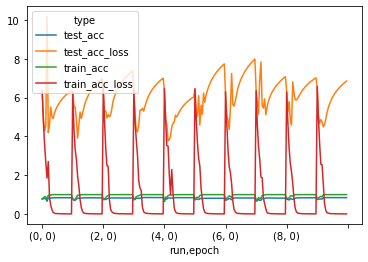

In [8]:
# Just an example
df_base.sample(30)

In [6]:
# An one for the siamese networks
df_siam2.head(27)

type       test_acc10  test_acc2  test_acc_loss  train_acc10  train_acc2  \
run epoch                                                                  
0   0           0.745      0.635      47.980403        0.730       0.654   
    1           0.870      0.783      16.412420        0.895       0.799   
    2           0.917      0.812      11.209818        0.938       0.833   
    3           0.946      0.850       7.798162        0.967       0.885   
    4           0.953      0.883       7.032009        0.977       0.912   
    5           0.942      0.850       7.418105        0.960       0.880   
    6           0.949      0.830       6.832983        0.971       0.860   
    7           0.948      0.887       5.935349        0.983       0.917   
    8           0.958      0.883       5.382072        0.986       0.919   
    9           0.962      0.909       4.412361        0.995       0.950   
    10          0.938      0.827       7.201962        0.972       0.870   
    11          0.963      0.896       4.571869        0.993       0.944   
    12          0.952      0.885       4.787580        0.991       0.948   
    13          0.963      0.894       4.663586        0.994       0.951   
    14          0.971      0.910       3.594496        1.000       0.970   
    15          0.952      0.888       5.524335        0.984       0.943   
    16          0.964      0.912       3.756456        0.997       0.966   
    17          0.964      0.906       3.671598        0.999       0.966   
    18          0.962      0.908       3.754604        1.000       0.967   
    19          0.956      0.901       3.960608        0.999       0.958   
    20          0.972      0.918       3.403104        1.000       0.983   
    21          0.970      0.922       3.331367        1.000       0.984   
    22          0.967      0.922       3.271843        1.000       0.991   
    23          0.970      0.917       3.248905        1.000       0.989   
    24          0.967      0.921       3.288816        1.000       0.991   
1   0           0.771      0.606      28.480580        0.796       0.599   
    1           0.844      0.657      25.490179        0.847       0.666   

type       train_acc_loss  
run epoch                  
0   0           43.407386  
    1           22.233778  
    2           12.699330  
    3            9.045775  
    4            7.096994  
    5            6.323999  
    6            6.125192  
    7            5.678741  
    8            5.157640  
    9            4.790487  
    10           5.293513  
    11           5.043609  
    12           4.211145  
    13           4.059079  
    14           3.679453  
    15           4.319210  
    16           4.132220  
    17           3.892461  
    18           3.512563  
    19           3.644943  
    20           3.395053  
    21           3.347035  
    22           3.272769  
    23           3.242447  
    24           3.233267  
1   0           44.780968  
    1           24.402761

In [56]:
df_base.xs(2, level = "run")

type,test_acc,test_acc_loss,train_acc,train_acc_loss
epoch,,,,
0,0.740,6.316523,0.767,6.434122
1,0.755,5.267231,0.784,4.815857
2,0.743,5.317733,0.847,3.398333
3,0.786,4.949758,0.923,2.492874
4,0.807,5.118023,0.938,2.453142
5,0.825,5.007373,0.990,0.745196
6,0.824,5.109854,0.999,0.239303
7,0.829,5.428408,1.000,0.115447
8,0.826,5.815087,1.000,0.060368


In [125]:
def plot_graph(model_data, model_name, column_name, epochs, title_fontsize, axis_fontsize):
    
    title_fontsize = 16
    axis_fontsize = 14



    # Create the avage line to plot
    df_base_avarage = model_data.xs(0, level = "run")[column_name][0:epochs]
    for run in range(1,10):
        df_base_avarage = df_base_avarage + model_data.xs(run, level = "run")[column_name][0:epochs]
    df_base_avarage = df_base_avarage/10



    for run in range(0,9):
        model_data.xs(run, level = "run")[column_name][0:epochs].plot(linestyle=':', fontsize = 12, linewidth=2)
    df_base_avarage.plot(color = 'black',fontsize = 12, linewidth=2, label = "mean",legend = "avarage_line", linestyle='--')
    
    plt.title(model_name, fontsize=title_fontsize)
    plt.ylabel("test_acc", fontsize=axis_fontsize)
    plt.xlabel("epoch", fontsize=axis_fontsize)
    plt.style.use('seaborn')

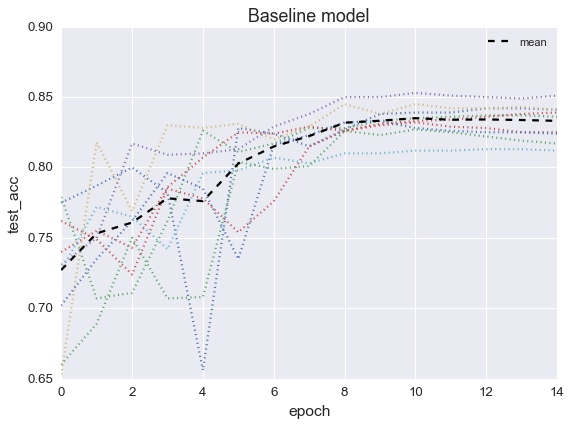

In [130]:
plot_graph(model_data = df_base,
           model_name = "Baseline model",
           column_name = "test_acc", 
           epochs = 15, 
           title_fontsize = 16, 
           axis_fontsize = 12)

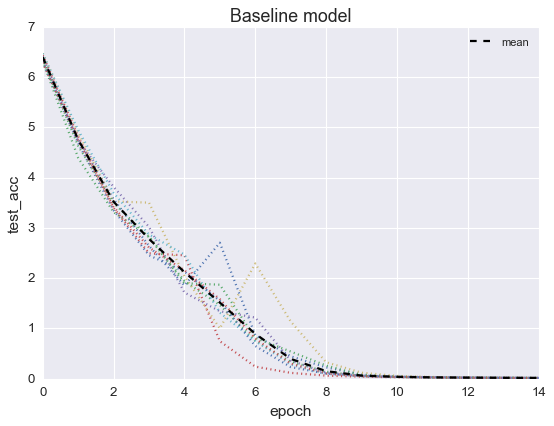

In [131]:
plot_graph(model_data = df_base,
           model_name = "Baseline model",
           column_name = "train_acc_loss", 
           epochs = 15, 
           title_fontsize = 16, 
           axis_fontsize = 12)

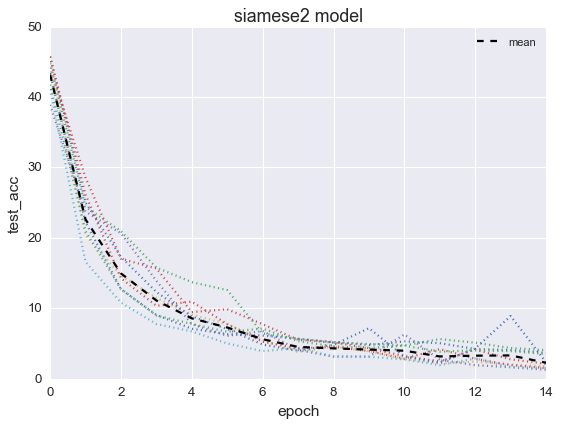

In [132]:
plot_graph(model_data = df_siam2, 
           model_name = "siamese2 model",
           column_name = "train_acc_loss", 
           epochs = 15, 
           title_fontsize = 16, 
           axis_fontsize = 12)

In [134]:
df_siam2

type       test_acc10  test_acc2  test_acc_loss  train_acc10  train_acc2  \
run epoch                                                                  
0   0           0.745      0.635      47.980403        0.730       0.654   
    1           0.870      0.783      16.412420        0.895       0.799   
    2           0.917      0.812      11.209818        0.938       0.833   
    3           0.946      0.850       7.798162        0.967       0.885   
    4           0.953      0.883       7.032009        0.977       0.912   
...               ...        ...            ...          ...         ...   
9   20          0.972      0.924       0.136086        1.000       0.999   
    21          0.972      0.924       0.129985        1.000       0.999   
    22          0.972      0.924       0.126012        1.000       0.999   
    23          0.972      0.924       0.121910        1.000       0.999   
    24          0.972      0.923       0.119218        1.000       0.999   

type       train_acc_loss  
run epoch                  
0   0           43.407386  
    1           22.233778  
    2           12.699330  
    3            9.045775  
    4            7.096994  
...                   ...  
9   20           0.036994  
    21           0.032532  
    22           0.029130  
    23           0.026412  
    24           0.024178  

[250 rows x 6 columns]

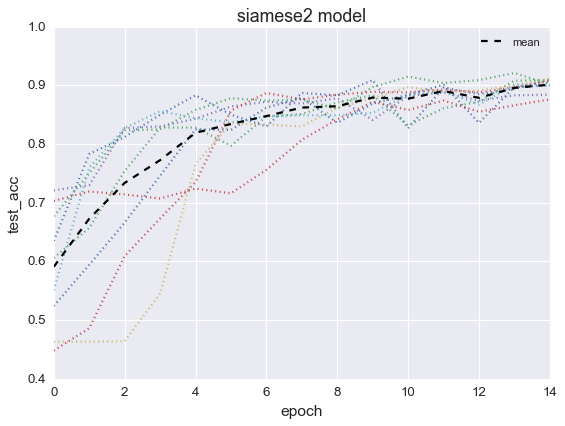

In [135]:
plot_graph(model_data = df_siam2,
           model_name = "siamese2 model",
           column_name = "test_acc2", 
           epochs = 15, 
           title_fontsize = 16, 
           axis_fontsize = 12)

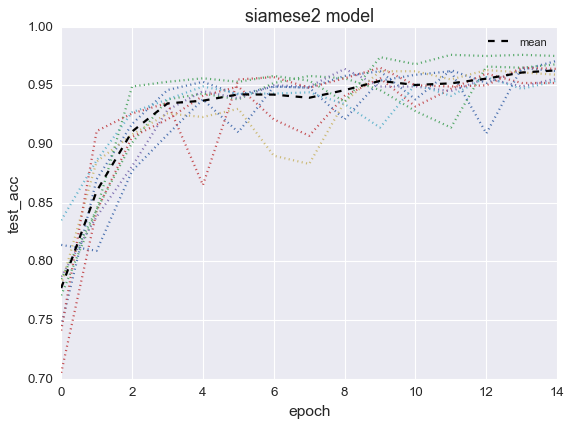

In [136]:
plot_graph(model_data = df_siam2,
           model_name = "siamese2 model",
           column_name = "test_acc10", 
           epochs = 15, 
           title_fontsize = 16, 
           axis_fontsize = 12)